In [1]:
import numpy as np
import matplotlib.pyplot as plt

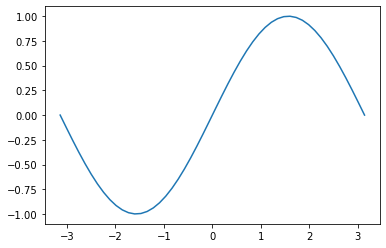

In [4]:
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)
t = np.sin(x)

# print(x)
plt.plot(x, t)
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)

Epoch 1/2000
6/6 [==============================] - 0s 34ms/step - loss: 0.6675 - val_loss: 0.1256
Epoch 2/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.4120 - val_loss: 0.0843
Epoch 3/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.3380 - val_loss: 0.0783
Epoch 4/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.3066 - val_loss: 0.0865
Epoch 5/2000
6/6 [==============================] - 0s 47ms/step - loss: 0.2827 - val_loss: 0.0925
Epoch 6/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.2623 - val_loss: 0.1158
Epoch 7/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.2444 - val_loss: 0.1235
Epoch 8/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.2328 - val_loss: 0.1390
Epoch 9/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.2192 - val_loss: 0.1732
Epoch 10/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.2066 - val_loss: 0.2122
Epoch 11/2

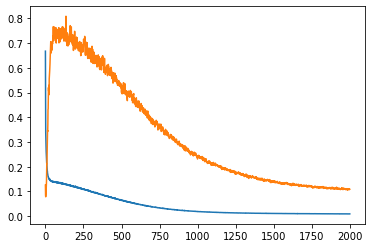

In [13]:
loss = history.history["loss"]
vloss = history.history["val_loss"]

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

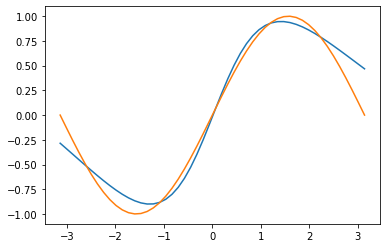

In [14]:
plt.plot(x, model.predict(x))
plt.plot(x, t)
plt.show()

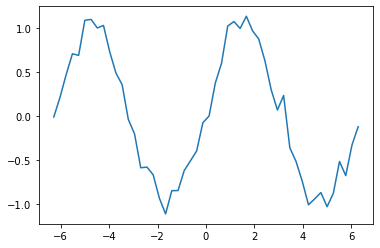

(40, 10, 1)
(40, 10, 1)


In [24]:
%matplotlib inline

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10
n_sample = len(x_data)-n_rnn
x = np.zeros((n_sample, n_rnn))
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]
    
x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [34]:
batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_5 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 0s 73ms/step - loss: 0.7068 - val_loss: 0.5149
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.4846 - val_loss: 0.3601
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.3626 - val_loss: 0.2711
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.2831 - val_loss: 0.2187
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.2294 - val_loss: 0.1809
Epoch 6/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1879 - val_loss: 0.1553
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1570 - val_loss: 0.1381
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1338 - val_loss: 0.1237
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1158 - val_loss: 0.1117
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1017 - val_loss: 0.1049
Epoch 11/20
5/5 [============

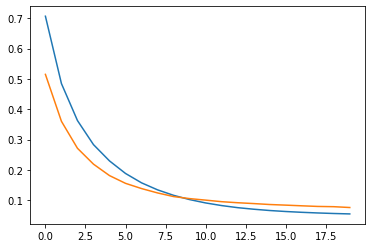

In [41]:
loss = history.history["loss"]
vloss = history.history["val_loss"]

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

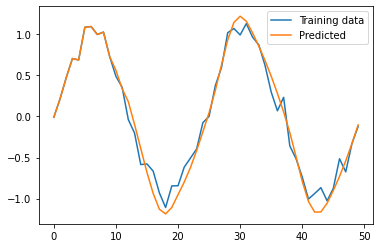

In [57]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))
    predicted = np.append(predicted, y[0][n_rnn-1][0])
    
plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()

In [58]:
import re

with open("kaijin_nijumenso.txt", mode="r", encoding="utf-8") as f:  # ファイルの読み込み
    text_original = f.read()

text = re.sub("《[^》]+》", "", text_original) # ルビの削除
text = re.sub("［[^］]+］", "", text) # 読みの注意の削除
text = re.sub("[｜ 　]", "", text) # | と全角半角スペースの削除
print("文字数", len(text))  # len() で文字列の文字数も取得可能

文字数 110323


In [59]:
n_rnn = 10
batch_size = 128
epochs = 60
n_mid = 128

In [66]:
chars = sorted(list(set(text)))
print("文字数 (重複無し) ", len(chars))
char_indices = {}
for i, char in enumerate(chars):
    char_indices[char] = i
indices_char = {}
for i, char in enumerate(chars):
    indices_char[i] = char
    
time_chars = []
next_chars = []
for i in range(0, len(text) - n_rnn):
    time_chars.append(text[i: i + n_rnn])
    next_chars.append(text[i + n_rnn])
    
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool)
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool)
for i, t_cs in enumerate(time_chars):
    t[i, char_indices[next_chars[i]]] = 1
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1
        
print("xの形状", x.shape)
print("tの形状", t.shape)

文字数 (重複無し)  1249
xの形状 (110313, 10, 1249)
tの形状 (110313, 1249)


In [71]:
model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, len(chars))))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128)               176384    
_________________________________________________________________
dense_6 (Dense)              (None, 1249)              161121    
Total params: 337,505
Trainable params: 337,505
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
from keras.callbacks import LambdaCallback
 
def on_epoch_end(epoch, logs):
    print("エポック: ", epoch)

    beta = 60  # 確率分布を調整する定数
    prev_text = text[0:n_rnn]  # 入力に使う文字
    created_text = prev_text  # 生成されるテキスト
    
    print("シード: ", created_text)

    for i in range(400):
        # 入力をone-hot表現に
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1
        
        # 予測を行い、次の文字を得る
        y = model.predict(x_pred)
        p_power = y[0] ** beta  # 確率分布の調整
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))        
        next_char = indices_char[next_index]

        created_text += next_char
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()

# エポック終了後に実行される関数を設定
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

In [82]:
history = model.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/60
861/862 [============================>.] - ETA: 0s - loss: 3.0129エポック:  0
シード:  そのころ、東京中の町


<ipython-input-80-db6288e4cbb3>:21: RuntimeWarning: invalid value encountered in true_divide
  next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))


ValueError: probabilities contain NaN